In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일합치기

In [ ]:
df_list = []
year = ['/content/강원도 산불 현황 데이터_20' + str(i) + '.csv' for i in range(11,22)]

In [ ]:
year

['/content/강원도 산불 현황 데이터_202011.csv',
 '/content/강원도 산불 현황 데이터_202012.csv',
 '/content/강원도 산불 현황 데이터_202013.csv',
 '/content/강원도 산불 현황 데이터_202014.csv',
 '/content/강원도 산불 현황 데이터_202015.csv',
 '/content/강원도 산불 현황 데이터_202016.csv',
 '/content/강원도 산불 현황 데이터_202017.csv',
 '/content/강원도 산불 현황 데이터_202018.csv',
 '/content/강원도 산불 현황 데이터_202019.csv',
 '/content/강원도 산불 현황 데이터_202020.csv',
 '/content/강원도 산불 현황 데이터_202021.csv']

In [ ]:
'/content/강원도 산불 현황 데이터_2011.csv'

In [ ]:
for i in year:
  df = pd.read_csv(i)
  df_list.append(df)

In [ ]:
org_df = pd.DataFrame()
for i in df_list:
  org_df = pd.concat([org_df, i], axis=0)
org_df.head()

,SN,WRINVSTG_NO,DPRS_CNT,INJPSN_CNT,HNL_DMGE_CNT,PRPRTY_DMGE_AMT,UPRINSTT_NM,FRSTT_NM,WARD_NM,LFDAU_NM,...,SOLDIER_CNT,ELCTY_GAS_INSTT_CNT,ETC_CNT,MBLZ_EQPMN_CNT,WETHR,TP,HUMIDITY,TIME_UNIT_WS,TIME_UNIT_WD,SPCNWS_CN
0,1,1.101230e+14,0,0,0,0,강원소방본부,강릉소방서,경포119안전센터,NaN,...,0,0,0,8,맑음,-1.0,30,45.0,8.0,NaN
1,2,1.102010e+14,0,0,0,184330,강원소방본부,양양소방서,하조대119안전센터,NaN,...,0,8,549,71,맑음,1.0,10,225.0,8.0,건조경보
2,3,1.102020e+14,0,0,0,0,강원소방본부,강릉소방서,경포119안전센터,NaN,...,0,0,0,15,맑음,1.0,550,135.0,4.0,NaN
3,4,1.102110e+14,0,0,0,4864,강원소방본부,홍천소방서,서석119안전센터,내촌119지역대,...,0,33,0,9,구름많음,-2.0,29,225.0,4.0,NaN
4,5,1.102120e+14,0,0,0,50,강원소방본부,원주소방서,흥업119안전센터,귀래119지역대,...,0,38,15,9,구름많음,-6.0,44,225.0,4.0,NaN


In [ ]:
org_df.to_csv('/content/df_total.csv', index=False,  encoding="utf-8-sig")

# 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 

In [2]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv('df.csv')

In [50]:
df.dtypes

일련번호           int64
인명피해수          int64
재산피해금액         int64
소방서명          object
서센터명          object
소방지역대명        object
화재발생일자         int64
화재발생시간         int64
접수일자           int64
접수시각           int64
출동일자           int64
출동시각           int64
현장도착일자         int64
현장도착시각         int64
초진일자           int64
초진시각           int64
완진일자           int64
완진시간           int64
출동소요시간         int64
화재진압시간         int64
현장소방서거리        int64
현장안전센터거리       int64
현장소방지역대거리    float64
시군구명          object
읍면동명          object
시설장소소분류명      object
화재유형명         object
발화지점          object
발화원인          object
발화요인대분류명      object
전체인력수합계        int64
동원장비수          int64
날씨            object
온도           float64
습도             int64
시간단위풍속       float64
시간단위풍향       float64
특보내용          object
dtype: object

In [5]:
df_add = df[['화재진압시간','특보내용','발화요인대분류명','출동소요시간']]

In [6]:
df_add.groupby('발화요인대분류명').mean()

,화재진압시간,출동소요시간
발화요인대분류명,,
교통사고,11805.000000,1749.000000
기계적요인,21861.250000,1864.000000
기타,19413.130435,1669.652174
미상,28060.981818,1869.745455
방화,5113.333333,819.000000
방화의심,4200.800000,797.000000
부주의,16282.068000,1458.865333
자연적인요인,30516.347826,1893.782609
전기적요인,34187.045455,1554.500000


교통사고는 단 한건으로, 무시해도 될 것 같다. 방화 요인의 경우엔 상대적으로 진압시간이 짧은 것으로 확인되고, 전기적요인(전신주 스파크로 인한 불씨)와 같은 자연 발생 요인일 수록 화재진압시간이 상당히 증가한다.

In [7]:
df_add.groupby('발화요인대분류명').mean()

,화재진압시간,출동소요시간
발화요인대분류명,,
교통사고,11805.000000,1749.000000
기계적요인,21861.250000,1864.000000
기타,19413.130435,1669.652174
미상,28060.981818,1869.745455
방화,5113.333333,819.000000
방화의심,4200.800000,797.000000
부주의,16282.068000,1458.865333
자연적인요인,30516.347826,1893.782609
전기적요인,34187.045455,1554.500000


In [37]:
time = df_add.groupby('발화요인대분류명').mean()

In [39]:
time

,화재진압시간,출동소요시간
발화요인대분류명,,
교통사고,11805.000000,1749.000000
기계적요인,21861.250000,1864.000000
기타,19413.130435,1669.652174
미상,28060.981818,1869.745455
방화,5113.333333,819.000000
방화의심,4200.800000,797.000000
부주의,16282.068000,1458.865333
자연적인요인,30516.347826,1893.782609
전기적요인,34187.045455,1554.500000


In [45]:
time = time.sort_values('화재진압시간',ascending = False)

In [48]:
time

,화재진압시간,출동소요시간
발화요인대분류명,,
전기적요인,34187.045455,1554.500000
자연적인요인,30516.347826,1893.782609
화학적요인,29844.857143,1568.285714
미상,28060.981818,1869.745455
기계적요인,21861.250000,1864.000000
기타,19413.130435,1669.652174
부주의,16282.068000,1458.865333
교통사고,11805.000000,1749.000000
방화,5113.333333,819.000000


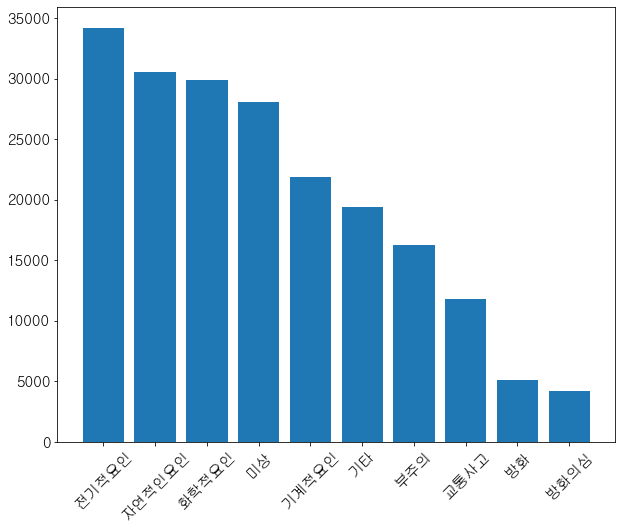

In [49]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 45, size=15)
plt.yticks(size=15)
plt.bar(time.index, time['화재진압시간'])
plt.show()

# 경보 시각화 및 진압시간 상관성 확인(평균값 사용)

In [ ]:
df_warn = df[['특보내용','화재진압시간']].dropna()
df_warn

,특보내용,화재진압시간
1,건조경보,155952
14,건조주의보,1600
18,건조주의보,11931
22,건조주의보,200
54,건조주의보,1100
...,...,...
1018,건조경보,55140
1021,건조주의보,4716
1027,건조주의보,205045
1044,풍랑주의보,20940


<BarContainer object of 9 artists>

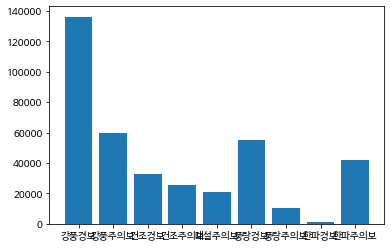

In [ ]:
plt.bar(np.sort(df_warn['특보내용'].unique()), df_warn.groupby('특보내용').mean()['화재진압시간'])

풍속 관련 경보가 났을 떄 화재지연시간이 크게 늘어남을 알 수 있고, 이를 통해 풍속과 화재의 심각성간 비례관계를 유추할 수 있다.

# 출동시간 확인해보자

In [ ]:
df_add = df[['특보내용','발화요인대분류명','출동소요시간']]

In [ ]:
df_add.groupby('발화요인대분류명').mean()

,출동소요시간
발화요인대분류명,
교통사고,1749.000000
기계적요인,1864.000000
기타,1669.652174
미상,1869.745455
방화,819.000000
방화의심,797.000000
부주의,1458.865333
자연적인요인,1893.782609
전기적요인,1554.500000


(<BarContainer object of 10 artists>,
 array(['교통사고', '기계적요인', '기타', '미상', '방화', '방화의심', '부주의', '자연적인요인',
        '전기적요인', '화학적요인'], dtype=object))

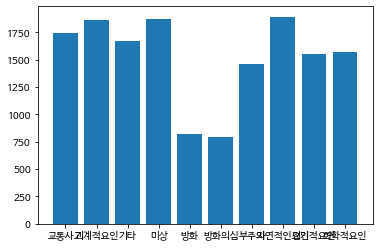

In [ ]:
plt.bar(np.sort(df_add['발화요인대분류명'].unique()), df_add.groupby('발화요인대분류명').mean()['출동소요시간']), np.sort(df_add['발화요인대분류명'].unique())

출동소요시간 역시 자연발생사건보다 방화사건의 경우 더 짧았음을 알 수 있었음.
또한 출동소요시간과 화재의 심각성이 비례관계라고 추측한다면, 자연발생의 경우 화재시작부터 소방관이 현장에 도착할 때 까지 시간소요가 큰 점이 화재진압시간을 늘리는 역할을 하는 것을 알 수 있음.

In [ ]:
df_add.groupby('특보내용').mean()

,출동소요시간
특보내용,
강풍경보,1137.000000
강풍주의보,1057.888889
건조경보,1282.692308
건조주의보,1607.612903
대설주의보,1409.000000
풍랑경보,1774.666667
풍랑주의보,1525.209302
한파경보,1384.500000
한파주의보,975.800000


In [ ]:
df_warn = df[['특보내용','출동소요시간']].dropna()
df_warn

,특보내용,출동소요시간
1,건조경보,1615
14,건조주의보,2000
18,건조주의보,5301
22,건조주의보,1202
54,건조주의보,400
...,...,...
1018,건조경보,839
1021,건조주의보,658
1027,건조주의보,2000
1044,풍랑주의보,1206


<BarContainer object of 9 artists>

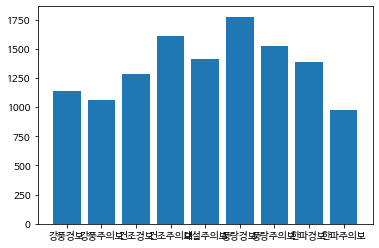

In [ ]:
plt.bar(np.sort(df_warn['특보내용'].unique()), df_warn.groupby('특보내용').mean()['출동소요시간'])

생각보다 경보에 따라서 출동시간은 큰 차이가 없었음. 경보는 출동시간과 관계없이 화재를 강하게 하는 요소로 볼 수 있을듯? (그만큼 기상환경이 화재발생에 유리하다는 뜻)

# 발화지점